# INM701 Coursework
## Imtiaz Ali 200022830

The goal is to use regression to predict if a UFC fighter wins more often based on features such height to weight ratio, Significant strikes landed and absorbed, takedowns attempted and defended and also submission attempts.

4100+ records, with 18 features.


### Printing the Dataset

In [35]:
import os
import pandas as pd
import numpy as np

path = "."
filename_read = ("ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,sig_strikes_landed_min,sig_strike_acc,sig_strikes_absorbed_min,sig_strike_def,avg_takedowns_landed_per_15_min,takedown_acc,takedown_def,avg_sub_attempted_15_min
0,Tom Tuggle,The Law,0,3,0,187.96,113.40,NaN,Orthodox,NaN,0.00,0,2.14,0,32.14,100,0,0.00
1,Theo Rlayang,Jungle King,5,1,0,170.18,65.77,165.10,Orthodox,10/08/1994,5.93,48,8.40,40,2.00,40,0,5.93
2,Frank Shamrock,NaN,23,10,2,177.80,83.91,NaN,Orthodox,08/12/1972,4.75,53,4.66,57,0.35,50,37,4.75
3,Jason Brilz,Hitman,22,6,1,180.34,92.99,180.34,Orthodox,07/07/1975,2.66,40,1.78,65,2.37,25,25,2.66
4,Glaico Franca Moreira,Nego,15,5,0,182.88,70.31,195.58,Orthodox,28/02/1991,2.35,42,3.46,47,2.68,42,76,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,Waldo Cortes-Acosta,Salsa Boy,10,1,0,193.04,117.93,198.12,Orthodox,03/10/1991,6.97,50,4.06,52,0.00,0,60,6.97
4105,Brandon Sayles,Man of War,5,1,0,195.58,120.20,NaN,NaN,NaN,0.00,0,0.00,0,0.00,0,0,0.00
4106,Elizabeth Phillips,NaN,6,6,0,167.64,61.23,165.10,Orthodox,20/08/1986,2.60,33,3.07,58,0.75,25,53,2.60
4107,Dave Galera,Scarecrow,5,1,0,180.34,61.23,NaN,Orthodox,12/01/1978,1.67,69,0.53,33,0.00,0,14,1.67


### Drop dataset columns and fill in blank values.

In [6]:
import os
import pandas as pd
import numpy as np

path = "."

filename_read = os.path.join(path, "ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Get a list of all numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns

# Apply median imputation to all numeric columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))

# Calculate the current ratio of the three string values in the column
value_counts = df['stance'].value_counts(normalize=True)

# Fill empty cells with the values based on the current ratio
df['stance'] = df['stance'].fillna(pd.Series(np.random.choice(value_counts.index, p=value_counts.values, size=len(df))))

columns_to_drop = ['name', 'nickname','date_of_birth']

# Drop columns if they exist
for column_to_drop in columns_to_drop:
    if column_to_drop in df.columns:
        df.drop(column_to_drop, axis=1, inplace=True)
    else:
        print(f"Column '{column_to_drop}' not found in DataFrame.")

df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2) 
df['strikeratio'] = df['sig_strikes_landed_min'] / df['sig_strikes_absorbed_min']
df['wld_ratio'] = df['wins'] / (df['losses'] + df['draws']).replace(0, 1)  # Avoid division by zero
df.to_csv("C:/Users/imtia/Desktop/INM701/newufc.csv", index=False)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df


,wins,losses,draws,height_cm,weight_kg,reach_in_cm,stance,sig_strikes_landed_min,sig_strike_acc,sig_strikes_absorbed_min,sig_strike_def,avg_takedowns_landed_15_min,takedown_acc,takedown_def,avg_sub_attempt_15_min,bmi,strikeratio,wld_ratio
0,8,5,0,193.04,117.93,182.88,Southpaw,0.00,0,0.00,0,0.00,0,0,0.00,31.646791,NaN,1.600000
1,11,6,0,193.04,92.99,200.66,Orthodox,2.97,40,3.81,51,2.64,41,52,2.97,24.954084,0.779528,1.833333
2,25,12,0,167.64,65.77,162.56,Orthodox,2.78,37,2.76,65,0.56,28,38,2.78,23.403054,1.007246,2.083333
3,4,2,0,162.56,56.70,182.88,Orthodox,2.71,46,2.15,51,1.94,60,68,2.71,21.456342,1.260465,2.000000
4,7,3,0,182.88,119.75,187.96,Southpaw,5.13,55,5.93,49,0.00,0,100,5.13,35.804952,0.865093,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4104,13,3,0,177.80,83.91,185.42,Southpaw,3.55,51,3.21,63,1.70,41,61,3.55,26.543012,1.105919,4.333333
4105,14,11,0,175.26,77.11,182.88,Orthodox,1.25,22,4.03,52,0.94,18,42,1.25,25.104125,0.310174,1.272727
4106,7,7,0,177.80,61.23,182.88,Orthodox,0.00,0,0.00,0,0.00,0,0,0.00,19.368712,NaN,1.000000
4107,23,8,0,177.80,70.31,185.42,Southpaw,3.70,46,2.51,69,1.62,50,75,3.70,22.240963,1.474104,2.875000


### Weight categories count

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


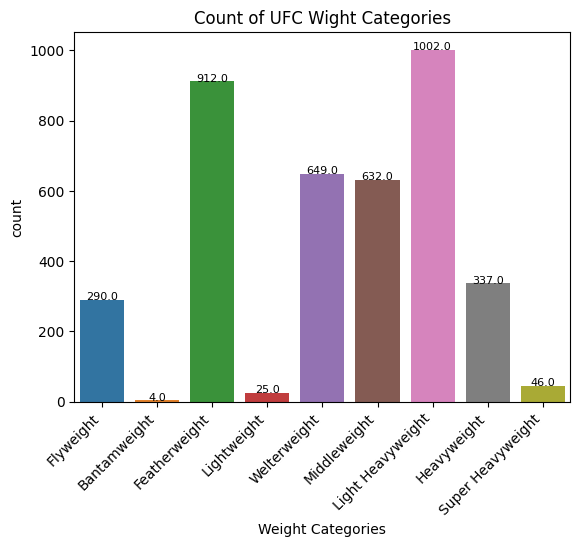

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "."
filename_read = os.path.join(path, "ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Define UFC weight categories
weight_categories = {
    'Strawweight': (0, 52.5),
    'Flyweight': (52.5, 56.7),
    'Bantamweight': (56.7, 61.2),
    'Featherweight': (61.2, 65.8),
    'Lightweight': (65.8, 70.3),
    'Welterweight': (70.3, 77.1),
    'Middleweight': (77.1, 83.9),
    'Light Heavyweight': (83.9, 102.1),
    'Heavyweight': (102.1, 120.2),
    'Super Heavyweight': (120.2, float('inf'))
}
# Categorize weights based on UFC weight categories
df['weight_category'] = pd.cut(df['weight_kg'], bins=[0] + [upper for (_, upper) in weight_categories.values()], labels=weight_categories.keys())

# Define the desired order of categories
weight_order = ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight', 
                 'Middleweight', 'Light Heavyweight', 'Heavyweight','Super Heavyweight']

# Now you can create your plots with the specified order
ax = sns.countplot(x='weight_category', data=df, order=weight_order)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black')
plt.title('Count of UFC Wight Categories')
plt.xlabel('Weight Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import os
import pandas as pd
import numpy as np

path = "."

filename_read = os.path.join(path, "ufcfightstats.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Get a list of all numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns

# Apply median imputation to all numeric columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.median()))

# Calculate the current ratio of the three string values in the column
value_counts = df['stance'].value_counts(normalize=True)

# Fill empty cells with the values based on the current ratio
df['stance'] = df['stance'].fillna(pd.Series(np.random.choice(value_counts.index, p=value_counts.values, size=len(df))))

columns_to_drop = ['name', 'nickname','stance']

# Drop columns if they exist
for column_to_drop in columns_to_drop:
    if column_to_drop in df.columns:
        df.drop(column_to_drop, axis=1, inplace=True)
    else:
        print(f"Column '{column_to_drop}' not found in DataFrame.")
df.to_csv("C:/Users/imtia/Desktop/INM701/newufc.csv", index=False)
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df
print(df[:5])

# Assuming 'label_column' is the name of the column containing your target variable (labels)
X = df.drop('wins', axis=1)  # Features
y = df['wins']  # Labels

# Print some information about the data before splitting
print(f"Original data shape: {X.shape}, {y.shape}")

# Perform the split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets to verify the split
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Print some information about the data after splitting and scaling
print(f"Scaled X_train shape: {X_train_scaled.shape}, Scaled X_val shape: {X_val_scaled.shape}")

# Define hyperparameter grid
nn_param_grid = {
    'hidden_layer_sizes': [(50, 20)],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create a grid search for the best hyperparameters
nn_grid_search = GridSearchCV(MLPRegressor(random_state=42, max_iter=2000), param_grid=nn_param_grid, cv=5, scoring='neg_mean_squared_error')
nn_grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_nn_model = nn_grid_search.best_estimator_

# Predict on the validation set
y_pred_val = best_nn_model.predict(X_val_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
print(f"Mean Squared Error (Neural Network): {mse_val}")

   wins  losses  draws  height_cm  weight_kg  reach_in_cm date_of_birth  \
0     4       3      0     177.80      77.11       182.88           NaN   
1    12       4      0     182.88      83.91       182.88    18/03/1972   
2     7       1      0     177.80      70.31       182.88           NaN   
3    23       6      0     180.34      65.77       182.88    30/12/1994   
4     3       5      0     172.72      64.86       182.88           NaN   

   sig_strikes_landed_min  sig_strike_acc  sig_strikes_absorbed_min  \
0                    2.11              44                      2.63   
1                    4.96              44                      2.80   
2                    0.00               0                      0.00   
3                    2.47              53                      4.91   
4                    0.00               0                      0.00   

   sig_strike_def  avg_takedowns_landed_15_min  takedown_acc  takedown_def  \
0              50                         0.

### Plot of weight against height with linear regression

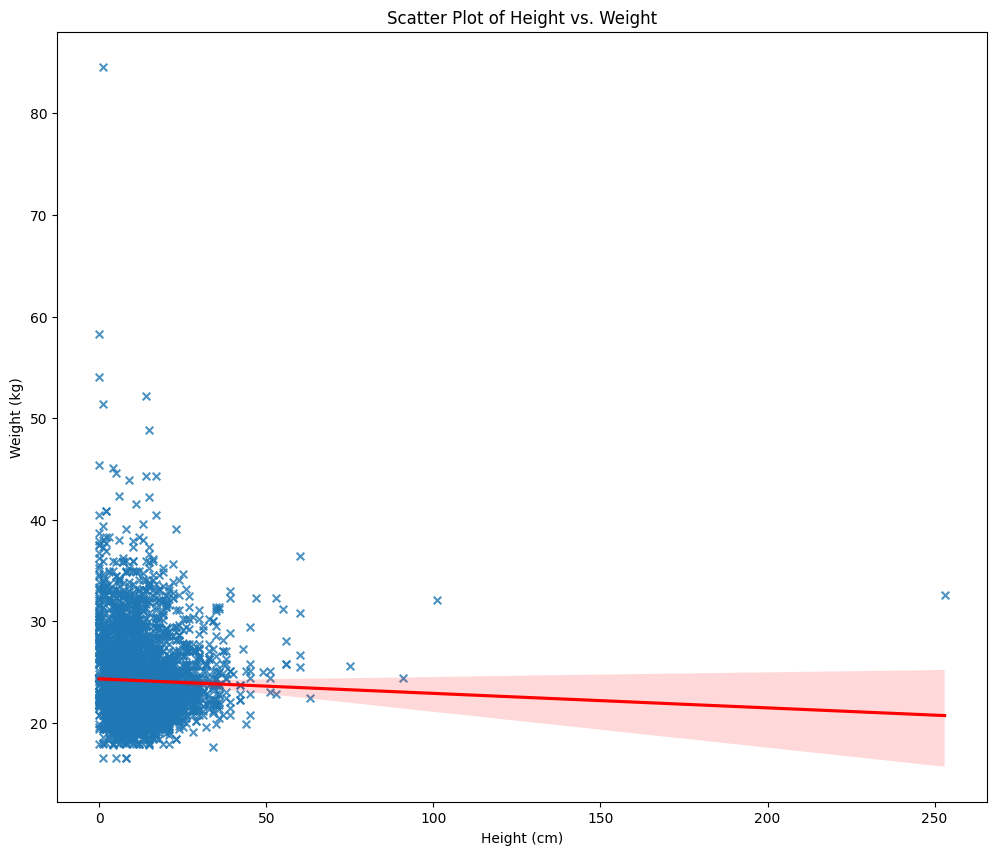

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

path = "."

filename_read = os.path.join(path, "newufc.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

#
plt.figure(figsize=(12, 10))
sns.regplot(x='wins', y='bmi', data=df,marker='x', scatter_kws={'s': 30}, line_kws={'color': 'red'})
plt.title('Scatter Plot of Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

#### Linear Regression:
Predicts a continuous outcome based on linear relationships between features and the target variable.

#### Random Forest Regression:
An ensemble of decision trees used for regression tasks.

#### Support Vector Regression (SVR):
Applies the principles of support vector machines to regression problems.

#### K-Nearest Neighbors Regression (KNN):
Predicts the target variable based on the average of the k-nearest neighbors.

#### Decision Tree Regression:
Uses a tree-like model to predict continuous values.

different ways to get the win rate include, bmi body weight to height, win ratio WLD, strike ratio for height and reach, takedown ratio for height and weight.

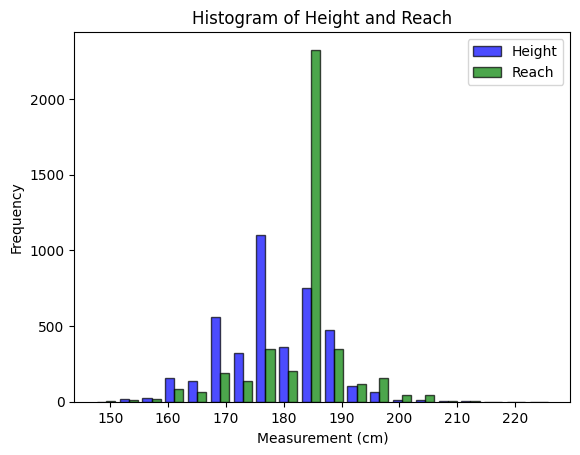

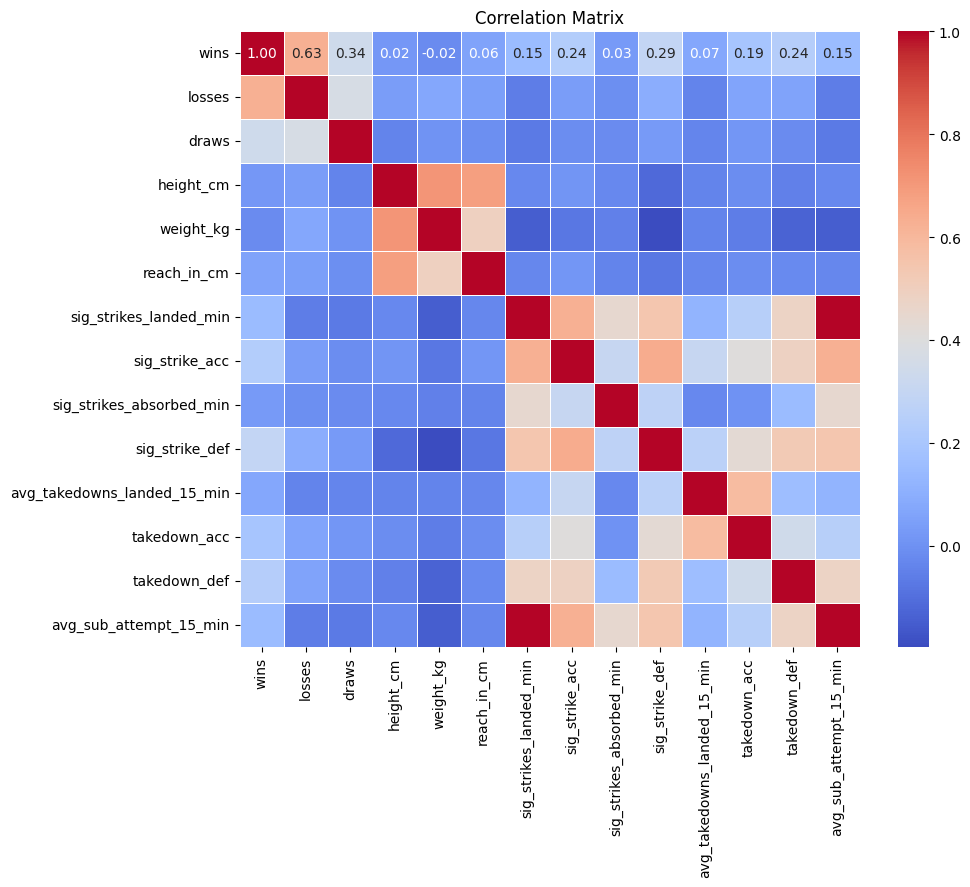

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from datetime import datetime

path = "."

filename_read = os.path.join(path, "newufc.csv")
df = pd.read_csv(filename_read, na_values=['NA', '?'])

# Assuming you have a DataFrame 'df' with columns 'height_cm' and 'reach_in_cm'
# Calculate the height vs reach differential
df['height_reach_diff'] = df['reach_in_cm'] - df['height_cm']

# Create a histogram with overlaid distributions
plt.hist([df['height_cm'], df['reach_in_cm']], bins=20, color=['blue', 'green'], label=['Height', 'Reach'], edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Measurement (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Height and Reach')
plt.legend()

# Show the plot
plt.show()

# Calculate strike ratio
df['strikeratio'] = df['sig_strikes_landed_min'] / df['sig_strikes_absorbed_min']
df['tdratio'] = df['avg_takedowns_landed_15_min'] / df['takedown_def']
#wins	losses	draws	height_cm	weight_kg	reach_in_cm	stance	
#sig_strikes_landed_min	sig_strike_acc	sig_strikes_absorbed_min	sig_strike_def	
#avg_takedowns_landed_15_min	takedown_acc	takedown_def	avg_sub_attempt_15_min	bmi

# Display the correlation matrix
#corr_matrix = df[['sig_strikes_landed_min','sig_strike_def','avg_takedowns_landed_15_min',
#                  'takedown_def','wins']].corr()

corr_matrix = df[['wins','losses','draws','height_cm','weight_kg','reach_in_cm','sig_strikes_landed_min','sig_strike_acc','sig_strikes_absorbed_min','sig_strike_def',
'avg_takedowns_landed_15_min','takedown_acc','takedown_def','avg_sub_attempt_15_min']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

see the correlation between height/reach and strike ratio. there is almost no correlation between height reach and striking, although it would be thought to have mattered